In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
from sklearn.datasets import load_iris

In [3]:
X , y= load_iris(return_X_y = True)

In [4]:
df = pd.DataFrame(data = X, columns = ['1', '2', '3', '4'])
df['target'] = y

In [5]:
df

,1,2,3,4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

tsne = TSNE(n_components=2)
tsne_X = tsne.fit_transform(X)

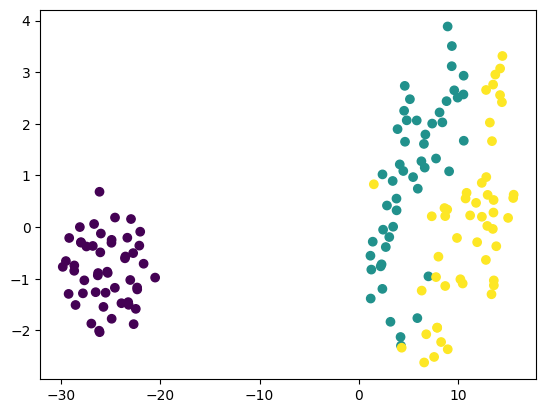

In [8]:
plt.scatter(tsne_X[:, 0], tsne_X[:, 1], c = y)

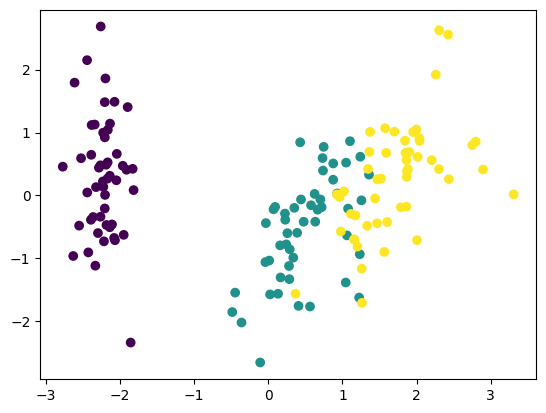

In [9]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c = y)

In [10]:
train_X, test_X, train_y, test_y = train_test_split(tsne_X, y, test_size = 0.3)

In [11]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(pca_X, y, test_size = 0.3)

In [12]:
svm = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm.fit(train_X, train_y)

SVC(kernel='linear')

In [13]:
svm2 = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm2.fit(train_X2, train_y2)

SVC(kernel='linear')

In [14]:
score = svm.score(test_X, test_y)

In [15]:
score2 = svm2.score(test_X2, test_y2)

In [16]:
score

0.9777777777777777

In [21]:
score2

0.9333333333333333

In [34]:
y_pred_tsne = svm.predict(test_X)
y_pred_pca = svm2.predict(test_X2)

In [38]:
#분류 알고리즘 평가 지표
accuracy_score(test_y, y_pred_tsne), precision_score(test_y, y_pred_tsne,average='weighted'), recall_score(test_y, y_pred_tsne,average='weighted'), confusion_matrix(test_y, y_pred_tsne)

(0.9777777777777777,
 0.9793650793650793,
 0.9777777777777777,
 array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  1, 20]]))

In [39]:
accuracy_score(test_y, y_pred_tsne), precision_score(test_y, y_pred_pca ,average='weighted'), recall_score(test_y, y_pred_pca ,average='weighted'), confusion_matrix(test_y, y_pred_pca)

(0.9777777777777777,
 0.36056980056980054,
 0.3111111111111111,
 array([[ 4,  4,  3],
        [ 5,  4,  4],
        [11,  4,  6]]))